In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [24]:

def sift_detector(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    output = cv2.drawKeypoints(image, keypoints, None)

    plt.figure(figsize=(8, 6))
    plt.imshow(output, cmap='gray')
    plt.title('SIFT Keypoints')
    plt.axis('off')
    plt.show()


In [25]:
def orb_feature_matching(image1_path, image2_path):
    img1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)
    orb = cv2.ORB_create()
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)
    
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)
    
    matched_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:20], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(matched_img)
    plt.title('ORB Feature Matching')
    plt.axis('off')
    plt.show()

In [26]:
def contour_detection(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Contours')
    plt.axis('off')
    plt.show()

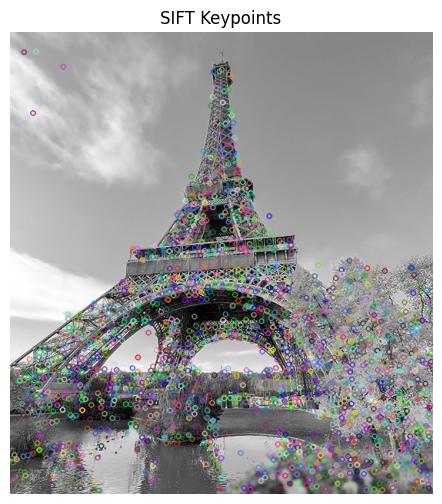

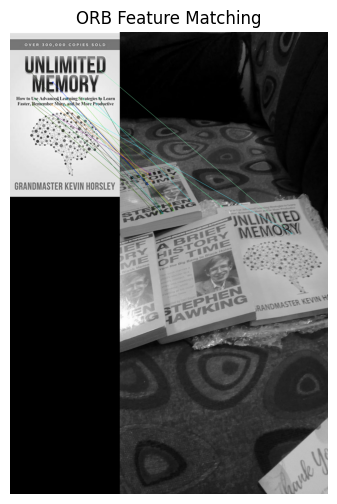

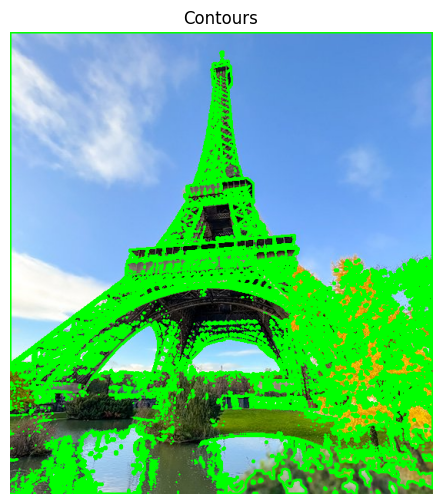

In [27]:
# Example usage:
sift_detector('effielt.jpg')
orb_feature_matching('booksc.png', 'book.png')
contour_detection('effielt.jpg')